In [10]:
raw_data= open('5.txt').read()
raw_data

" \nMobile Phones Under Rs.15,000 in Pakistan\n \n\n\nSort By:\n\n\nDefault sorting\nSort by Latest\nSort by price: low to high\nSort by price: high to low\n\n\n\n\n\n\n\n\n\n \n\nSort By:\n\n\nDefault sorting\nSort by Latest\nSort by price: low to high\nSort by price: high to low\n\n\n\n \nSort By:\n\n\nDefault sorting\nSort by Latest\nSort by price: low to high\nSort by price: high to low\n\n\n \n\nDefault sorting\nSort by Latest\nSort by price: low to high\nSort by price: high to low\n\n \n\n\n\n \n\n \n\n\n\n\nRAM\n\nSelect RAM\n2GB\n4GB\n8GB\n12GB\n16GB\n\n\n\n\n\nStorage\n\nSelect ROM\n32GB\n64GB\n128GB\n256GB\n512GB\n\n\n\n\n\nCamera\n\nSelect Camera\n12MP\n13MP\n16MP\n24MP\n48MP\n64MP\n108MP\n\n\n\n\n\nYear\n\nSelect Year\n2023\n2022\n2021\n2020\n2019\n\n\n\n\n\nBrand\n\nSelect Brand\nSamsung\nOppo\nApple\nHuawei\nVivo\nInfinix\nTecno\nQmobile\nLG\nLenovo\nXiaomi\nOneplus\nRealme\nHonor\nNokia\nGfive\nAlcatel\nSony\nItel\nRivo\n\n\n\n\n\nNetwork Band\n\nSelect Network\n4G Band\

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix

In [14]:
data=pd.Series(raw_data)

In [15]:
data

0     \nMobile Phones Under Rs.15,000 in Pakistan\n...
dtype: object

In [16]:
data_processed= data.apply(lambda x: re.sub(r'[^a-zA-Z/s]+',' ',x).lower())
data_processed

0     mobile phones under rs in pakistan sort by de...
dtype: object

In [58]:
stop_words= stopwords.words('english')
#stop_words.extend(['tecno','nokia', 'sort','price','low','high','infinix','apple','pro','pop'])

In [59]:
from nltk import word_tokenize

In [60]:
data_final = data_processed.apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)>2]))

In [61]:
data_final

0    mobile phones pakistan sort default sorting so...
dtype: object

In [62]:
words_list = []
for sentence in data_final:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common()


[('tecno', 116),
 ('nokia', 106),
 ('infinix', 76),
 ('pop', 32),
 ('select', 30),
 ('huawei', 26),
 ('samsung', 16),
 ('apple', 16),
 ('sort', 15),
 ('band', 15),
 ('spark', 12),
 ('smart', 12),
 ('hot', 12),
 ('price', 11),
 ('mobile', 10),
 ('phones', 10),
 ('ram', 10),
 ('camera', 10),
 ('year', 10),
 ('brand', 10),
 ('network', 10),
 ('low', 9),
 ('high', 9),
 ('honor', 9),
 ('pro', 8),
 ('lite', 8),
 ('oppo', 6),
 ('vivo', 6),
 ('qmobile', 6),
 ('lenovo', 6),
 ('xiaomi', 6),
 ('oneplus', 6),
 ('sony', 6),
 ('rivo', 6),
 ('pakistan', 5),
 ('storage', 5),
 ('rom', 5),
 ('realme', 5),
 ('gfive', 5),
 ('alcatel', 5),
 ('itel', 5),
 ('default', 4),
 ('sorting', 4),
 ('latest', 4),
 ('galaxy', 4),
 ('core', 4),
 ('prime', 4),
 ('air', 4),
 ('iphone', 4),
 ('flip', 4),
 ('plus', 4),
 ('phone', 4),
 ('users', 3),
 ('excellent', 3),
 ('may', 3),
 ('smartphone', 2),
 ('looking', 2),
 ('also', 2),
 ('option', 2),
 ('meet', 2),
 ('needs', 2),
 ('many', 2),
 ('one', 2),
 ('requirements', 2),


In [63]:
words_list

['mobile',
 'phones',
 'pakistan',
 'sort',
 'default',
 'sorting',
 'sort',
 'latest',
 'sort',
 'price',
 'low',
 'high',
 'sort',
 'price',
 'high',
 'low',
 'sort',
 'default',
 'sorting',
 'sort',
 'latest',
 'sort',
 'price',
 'low',
 'high',
 'sort',
 'price',
 'high',
 'low',
 'sort',
 'default',
 'sorting',
 'sort',
 'latest',
 'sort',
 'price',
 'low',
 'high',
 'sort',
 'price',
 'high',
 'low',
 'default',
 'sorting',
 'sort',
 'latest',
 'sort',
 'price',
 'low',
 'high',
 'sort',
 'price',
 'high',
 'low',
 'ram',
 'select',
 'ram',
 'storage',
 'select',
 'rom',
 'camera',
 'select',
 'camera',
 'year',
 'select',
 'year',
 'brand',
 'select',
 'brand',
 'samsung',
 'oppo',
 'apple',
 'huawei',
 'vivo',
 'infinix',
 'tecno',
 'qmobile',
 'lenovo',
 'xiaomi',
 'oneplus',
 'realme',
 'honor',
 'nokia',
 'gfive',
 'alcatel',
 'sony',
 'itel',
 'rivo',
 'network',
 'band',
 'select',
 'network',
 'band',
 'band',
 'ram',
 'select',
 'ram',
 'storage',
 'select',
 'rom',
 'ca

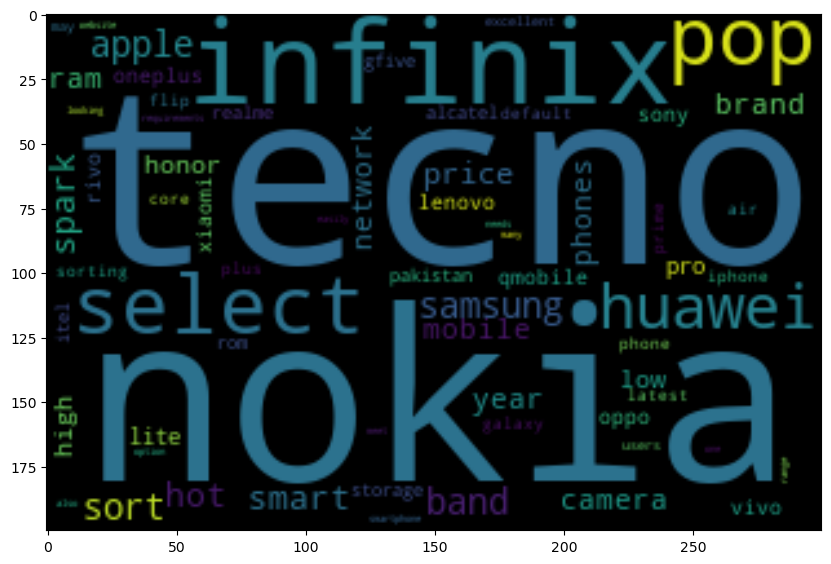

In [64]:
from wordcloud import WordCloud
import wordcloud

wcloud_fig = WordCloud( stopwords = set(wordcloud.STOPWORDS), colormap = 'viridis', width = 300 , height = 200).generate_from_frequencies(freq_dist)

#plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation = 'bilinear')
plt.show()

In [65]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

In [66]:
words_sent = [x.split() for x in data_final]
words_sent
bigram= Phrases(words_sent, min_count=5, threshold=100)
trigram= Phrases(bigram[words_sent], threshold=100)

bigram_phraser= Phraser(bigram)
trigram_phraser= Phraser(trigram)

#bag of words for creating bigram and trigram

bow=[trigram_phraser[bigram_phraser[word]] for word in words_sent]

In [67]:
bow[0:1]

[['mobile',
  'phones',
  'pakistan',
  'sort',
  'default',
  'sorting',
  'sort',
  'latest',
  'sort',
  'price',
  'low',
  'high',
  'sort',
  'price',
  'high',
  'low',
  'sort',
  'default',
  'sorting',
  'sort',
  'latest',
  'sort',
  'price',
  'low',
  'high',
  'sort',
  'price',
  'high',
  'low',
  'sort',
  'default',
  'sorting',
  'sort',
  'latest',
  'sort',
  'price',
  'low',
  'high',
  'sort',
  'price',
  'high',
  'low',
  'default',
  'sorting',
  'sort',
  'latest',
  'sort',
  'price',
  'low',
  'high',
  'sort',
  'price',
  'high',
  'low',
  'ram',
  'select',
  'ram',
  'storage',
  'select',
  'rom',
  'camera',
  'select',
  'camera',
  'year',
  'select',
  'year',
  'brand',
  'select',
  'brand',
  'samsung',
  'oppo',
  'apple',
  'huawei',
  'vivo',
  'infinix',
  'tecno',
  'qmobile',
  'lenovo',
  'xiaomi',
  'oneplus',
  'realme',
  'honor',
  'nokia',
  'gfive',
  'alcatel',
  'sony',
  'itel',
  'rivo',
  'network',
  'band',
  'select',
 

In [68]:
import spacy
nlp= spacy.load('en_core_web_sm', disable=['parser','ner'])

In [69]:
doc= nlp(' '.join(bow[0]))
for token in doc:
    print(token, '=>', token.pos_)

mobile => ADJ
phones => NOUN
pakistan => PROPN
sort => PROPN
default => NOUN
sorting => VERB
sort => NOUN
latest => ADJ
sort => NOUN
price => NOUN
low => ADJ
high => ADJ
sort => NOUN
price => NOUN
high => ADJ
low => ADJ
sort => NOUN
default => NOUN
sorting => VERB
sort => NOUN
latest => ADJ
sort => NOUN
price => NOUN
low => ADJ
high => ADJ
sort => NOUN
price => NOUN
high => ADJ
low => ADJ
sort => NOUN
default => NOUN
sorting => VERB
sort => NOUN
latest => ADJ
sort => NOUN
price => NOUN
low => ADJ
high => ADJ
sort => NOUN
price => NOUN
high => ADJ
low => ADJ
default => NOUN
sorting => VERB
sort => NOUN
latest => ADJ
sort => NOUN
price => NOUN
low => ADJ
high => ADJ
sort => NOUN
price => NOUN
high => ADJ
low => NOUN
ram => PROPN
select => PROPN
ram => PROPN
storage => NOUN
select => ADJ
rom => PROPN
camera => NOUN
select => ADJ
camera => NOUN
year => NOUN
select => ADJ
year => NOUN
brand => NOUN
select => ADJ
brand => PROPN
samsung => PROPN
oppo => PROPN
apple => PROPN
huawei => PROPN
vi

In [70]:
#now lemmatizing the whole corpus so that we can reach to the  root words

def lemmatization(texts, tags=['NOUN','ADJ','VERB','ADV','PROPN']):
    texts_out= []
    for sent in texts:
        doc= nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in tags])
    return texts_out

In [71]:
bag_of_words = lemmatization(bow)

In [76]:
#this gives us the keywords
bag_of_words

[['mobile',
  'phone',
  'pakistan',
  'sort',
  'default',
  'sort',
  'sort',
  'late',
  'sort',
  'price',
  'low',
  'high',
  'sort',
  'price',
  'high',
  'low',
  'sort',
  'default',
  'sort',
  'sort',
  'late',
  'sort',
  'price',
  'low',
  'high',
  'sort',
  'price',
  'high',
  'low',
  'sort',
  'default',
  'sort',
  'sort',
  'late',
  'sort',
  'price',
  'low',
  'high',
  'sort',
  'price',
  'high',
  'low',
  'default',
  'sort',
  'sort',
  'late',
  'sort',
  'price',
  'low',
  'high',
  'sort',
  'price',
  'high',
  'low',
  'ram',
  'select',
  'ram',
  'storage',
  'select',
  'rom',
  'camera',
  'select',
  'camera',
  'year',
  'select',
  'year',
  'brand',
  'select',
  'brand',
  'samsung',
  'oppo',
  'apple',
  'huawei',
  'vivo',
  'infinix',
  'tecno',
  'qmobile',
  'lenovo',
  'xiaomi',
  'oneplus',
  'realme',
  'honor',
  'nokia',
  'gfive',
  'alcatel',
  'sony',
  'itel',
  'rivo',
  'network',
  'band',
  'select',
  'network',
  'band',

In [74]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)
print(id2word)

Dictionary(139 unique tokens: ['acquire', 'address', 'air', 'alcatel', 'also']...)
